In [152]:
#Importing Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math as m
import os

In [153]:
#Loading the data 
#Note: Here I have given the local path for the dataset, kindly change it.
df = pd.read_csv(r'C:\Users\Ritesh\OneDrive\Desktop\weatherHistory.csv')
df.head(8)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259,9.9820,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260,9.9820,1016.84,Partly cloudy throughout the day.


In [154]:
#shape of data
df.shape

(96453, 11)

In [155]:
#Changing column name
df.rename(columns={'Apparent Temperature (C)':'Apparent_Temperature(C)'},inplace=True)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent_Temperature(C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [156]:
#Check for null values
df.isna().sum()

Formatted Date               0
Summary                      0
Precip Type                517
Temperature (C)              0
Apparent_Temperature(C)      0
Humidity                     0
Wind Speed (km/h)            0
Wind Bearing (degrees)       0
Visibility (km)              0
Pressure (millibars)         0
Daily Summary                0
dtype: int64

In [157]:
#Data Types
df.dtypes

Formatted Date              object
Summary                     object
Precip Type                 object
Temperature (C)            float64
Apparent_Temperature(C)    float64
Humidity                   float64
Wind Speed (km/h)          float64
Wind Bearing (degrees)       int64
Visibility (km)            float64
Pressure (millibars)       float64
Daily Summary               object
dtype: object

In [158]:
#Descriptive Statistics for data
df.describe()

,Temperature (C),Apparent_Temperature(C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [159]:
#Formatting Dates
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc= True)
df.dtypes

Formatted Date             datetime64[ns, UTC]
Summary                                 object
Precip Type                             object
Temperature (C)                        float64
Apparent_Temperature(C)                float64
Humidity                               float64
Wind Speed (km/h)                      float64
Wind Bearing (degrees)                   int64
Visibility (km)                        float64
Pressure (millibars)                   float64
Daily Summary                           object
dtype: object

In [160]:
#Adding new columns
df['Year'] = df['Formatted Date'].dt.year
df['Month'] = df['Formatted Date'].dt.month_name()

In [161]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent_Temperature(C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Year,Month
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,2006,March
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,2006,March
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,2006,April
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,2006,April
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,2006,April


In [162]:
#Group the values
Year_grp = df.groupby(['Year','Month'])

In [163]:
#Getting specific group
Year_grp.get_group((2006,'April'))

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent_Temperature(C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Year,Month
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,2006,April
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,2006,April
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,2006,April
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66,Partly cloudy throughout the day.,2006,April
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259,9.9820,1016.72,Partly cloudy throughout the day.,2006,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,2006-04-09 19:00:00+00:00,Partly Cloudy,rain,11.161111,11.161111,0.61,10.9319,130,9.9820,1014.60,Partly cloudy starting in the afternoon.,2006,April
718,2006-04-09 20:00:00+00:00,Partly Cloudy,rain,10.027778,10.027778,0.68,11.1734,138,15.8263,1014.69,Partly cloudy starting in the afternoon.,2006,April
719,2006-04-09 21:00:00+00:00,Partly Cloudy,rain,10.138889,10.138889,0.65,13.6206,140,14.9569,1014.51,Partly cloudy starting in the afternoon.,2006,April
5831,2006-04-30 22:00:00+00:00,Mostly Cloudy,rain,12.733333,12.733333,0.54,14.1036,159,15.8263,1014.48,Mostly cloudy until night.,2006,April


In [164]:
#Getting average values
Avg_Year_grp = Year_grp.agg(['mean'])
Avg_Year_grp

Temperature (C) Apparent_Temperature(C)  Humidity  \
                          mean                    mean      mean   
Year Month                                                         
2005 December         0.577778               -4.050000  0.890000   
2006 April           12.635031               12.098827  0.728625   
     August          19.478726               19.528241  0.760753   
     December         2.218220                0.107310  0.905376   
     February        -0.065394               -2.990716  0.843467   
...                        ...                     ...       ...   
2016 March            7.436940                5.901404  0.764677   
     May             16.324836               16.199216  0.702164   
     November         5.282662                3.048627  0.848472   
     October          9.893242                8.923947  0.799906   
     September       18.467924               18.355833  0.688833   

               Wind Speed (km/h) Wind Bearing (degrees) Visibility (km)  \
                            mean                   mean            mean   
Year Month                                                                
2005 December          17.114300             140.000000        9.982000   
2006 April             10.930670             191.877778       10.626760   
     August             9.634076             232.391129       11.519615   
     December           9.306471             175.428763        5.188312   
     February          10.957008             197.886905        7.418794   
...                          ...                    ...             ...   
2016 March             11.632077             175.620968       11.192097   
     May               11.274999             188.189516       13.272091   
     November          10.302860             168.780556        8.301652   
     October           11.566855             190.262097        8.025677   
     September          6.849029             177.738889       13.723260   

               Pressure (millibars)  
                               mean  
Year Month                           
2005 December           1016.660000  
2006 April              1013.493694  
     August              935.057782  
     December           1025.533414  
     February            995.183914  
...                             ...  
2016 March              1005.506989  
     May                1012.641102  
     November           1019.297486  
     October            1020.521210  
     September          1017.969736  

[133 rows x 7 columns]

Equation of trend line for Temperature Plot is  
0.0962 x - 192.6


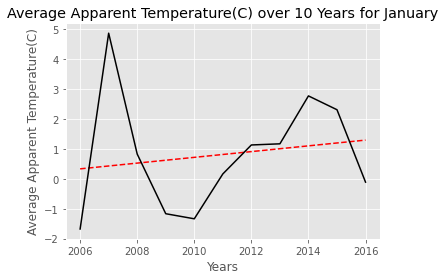

In [165]:
#For January
Years_x = [x for x,y in Avg_Year_grp.index if y == 'January' ]
plt.style.use('ggplot')  
Avg_Temp_y = []
for i in Years_x:
    Avg_Temp_y.append(Avg_Year_grp.loc[(i,'January'),('Temperature (C)','mean')])    

z = np.polyfit(Years_x,Avg_Temp_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--")    
print("Equation of trend line for Temperature Plot is {}".format(p))

plt.title('Average Apparent Temperature(C) over 10 Years for January')
plt.xlabel('Years')
plt.ylabel('Average Apparent Temperature(C)')
plt.plot(Years_x,Avg_Temp_y,color='k')
plt.tight_layout()
plt.savefig('1a.png')
plt.show()

Equation of trend line for Humidity Plot is  
0.002387 x - 3.949


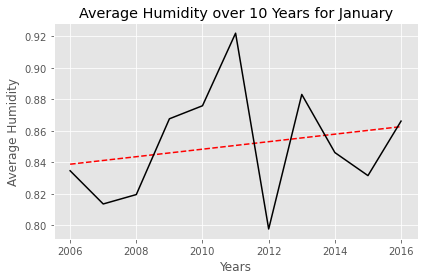

In [166]:
#Humidity Plot for January
Years_x = [x for x,y in Avg_Year_grp.index if y == 'January' ]
plt.style.use('ggplot')
Avg_Humidity_y = []
for i in Years_x:
    Avg_Humidity_y.append(Avg_Year_grp.loc[(i,'January'),('Humidity','mean')])    

z = np.polyfit(Years_x,Avg_Humidity_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--")    
print("Equation of trend line for Humidity Plot is {}".format(p))

plt.title('Average Humidity over 10 Years for January')
plt.xlabel('Years')
plt.ylabel('Average Humidity')
plt.plot(Years_x,Avg_Humidity_y,color='k')
plt.tight_layout()
plt.savefig('1b.png')
plt.show()       

Equation of trend line is  
0.1945 x - 388.9


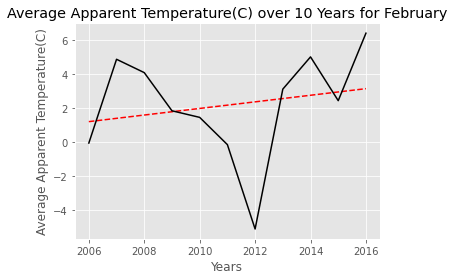

In [167]:
#For February
Years_x = [x for x,y in Avg_Year_grp.index if y == 'February' ]
plt.style.use('ggplot')
Avg_Temp_y = []
for i in Years_x:
    Avg_Temp_y.append(Avg_Year_grp.loc[(i,'February'),('Temperature (C)','mean')])    

z = np.polyfit(Years_x,Avg_Temp_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--")    
print("Equation of trend line is {}".format(p))

plt.title('Average Apparent Temperature(C) over 10 Years for February')
plt.xlabel('Years')
plt.ylabel('Average Apparent Temperature(C)')
plt.plot(Years_x,Avg_Temp_y,color='k')
plt.tight_layout()
plt.savefig('2a.png')
plt.show()    

Equation of trend line for Humidity Plot is  
0.002891 x - 4.999


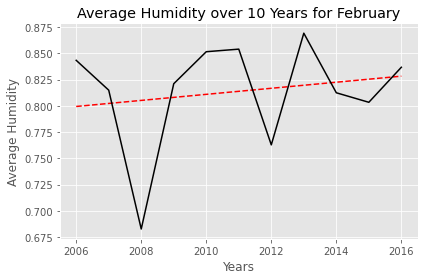

In [168]:
#Humidity Plot for February
Years_x = [x for x,y in Avg_Year_grp.index if y == 'February' ]
Avg_Humidity_y = []
for i in Years_x:
    Avg_Humidity_y.append(Avg_Year_grp.loc[(i,'February'),('Humidity','mean')])    
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Humidity_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--")    
print("Equation of trend line for Humidity Plot is {}".format(p))

plt.title('Average Humidity over 10 Years for February')
plt.xlabel('Years')
plt.ylabel('Average Humidity')
plt.plot(Years_x,Avg_Humidity_y,color='k')
plt.tight_layout()
plt.savefig('2b.png')
plt.show() 

Equation of trend line is  
0.1264 x - 247.2


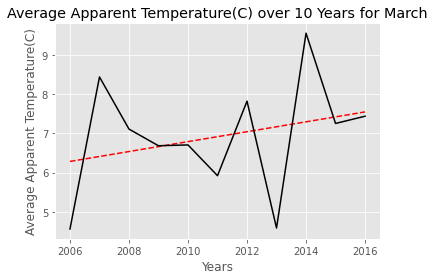

In [169]:
#For March
Years_x = [x for x,y in Avg_Year_grp.index if y == 'March' ]
Avg_Temp_y = []
for i in Years_x:
    Avg_Temp_y.append(Avg_Year_grp.loc[(i,'March'),('Temperature (C)','mean')])    
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Temp_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--")    
print("Equation of trend line is {}".format(p))

plt.title('Average Apparent Temperature(C) over 10 Years for March')
plt.xlabel('Years')
plt.ylabel('Average Apparent Temperature(C)')
plt.plot(Years_x,Avg_Temp_y,color='k')
plt.tight_layout()
plt.savefig('3a.png')
plt.show()    

Equation of trend line for Humidity Plot is  
-0.00218 x + 5.087


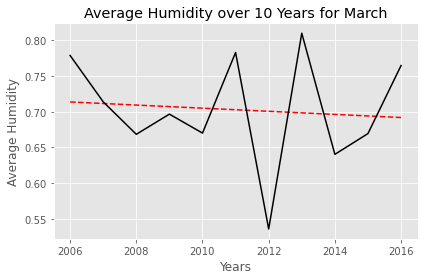

In [170]:
#Humidity Plot for March
Years_x = [x for x,y in Avg_Year_grp.index if y == 'March' ]
Avg_Humidity_y = []
for i in Years_x:
    Avg_Humidity_y.append(Avg_Year_grp.loc[(i,'March'),('Humidity','mean')])    
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Humidity_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--")    
print("Equation of trend line for Humidity Plot is {}".format(p))

plt.title('Average Humidity over 10 Years for March')
plt.xlabel('Years')
plt.ylabel('Average Humidity')
plt.plot(Years_x,Avg_Humidity_y,color='k')
plt.tight_layout()
plt.savefig('3b.png')
plt.show() 

Equation of trend line is  
0.01305 x - 13.48


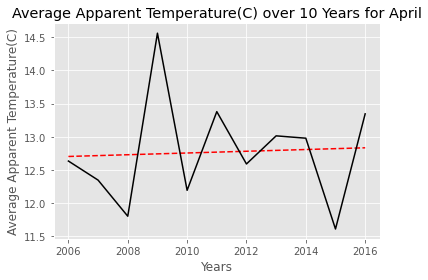

In [171]:
# Plot for april
Years_x = [x for x,y in Avg_Year_grp.index if y == 'April' ]
Avg_Temp_y = []
for i in Years_x:
    Avg_Temp_y.append(Avg_Year_grp.loc[(i,'April'),('Temperature (C)','mean')])   
    
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Temp_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--") 
print("Equation of trend line is {}".format(p))

plt.title('Average Apparent Temperature(C) over 10 Years for April')
plt.xlabel('Years')
plt.ylabel('Average Apparent Temperature(C)')
plt.plot(Years_x,Avg_Temp_y,color='k')
plt.tight_layout()
plt.savefig('4a.png')
plt.show()    

Equation of trend line for Humidity Plot is  
-0.001273 x + 3.201


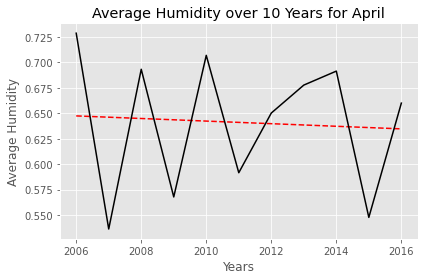

In [172]:
#Humidity Plot for April
Years_x = [x for x,y in Avg_Year_grp.index if y == 'April' ]
Avg_Humidity_y = []
for i in Years_x:
    Avg_Humidity_y.append(Avg_Year_grp.loc[(i,'April'),('Humidity','mean')])    
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Humidity_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--")    
print("Equation of trend line for Humidity Plot is {}".format(p))

plt.title('Average Humidity over 10 Years for April')
plt.xlabel('Years')
plt.ylabel('Average Humidity')
plt.plot(Years_x,Avg_Humidity_y,color='k')
plt.tight_layout()
plt.savefig('4b.png')
plt.show() 

Equation of trend line is  
-0.02658 x + 70.33


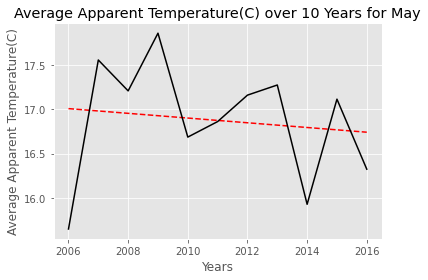

In [173]:
# Plot for May
Years_x = [x for x,y in Avg_Year_grp.index if y == 'May' ]
Avg_Temp_y = []
for i in Years_x:
    Avg_Temp_y.append(Avg_Year_grp.loc[(i,'May'),('Temperature (C)','mean')])   
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Temp_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--") 
print("Equation of trend line is {}".format(p))

plt.title('Average Apparent Temperature(C) over 10 Years for May')
plt.xlabel('Years')
plt.ylabel('Average Apparent Temperature(C)')
plt.plot(Years_x,Avg_Temp_y,color='k')
plt.tight_layout()
plt.savefig('5a.png')
plt.show()    

Equation of trend line for Humidity Plot is  
0.003475 x - 6.297


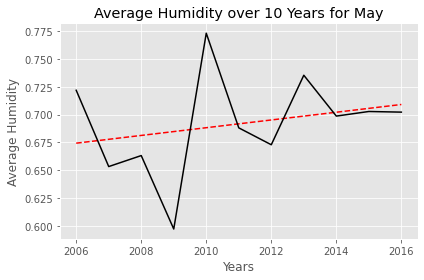

In [174]:
#Humidity Plot for May
Years_x = [x for x,y in Avg_Year_grp.index if y == 'May' ]
Avg_Humidity_y = []
for i in Years_x:
    Avg_Humidity_y.append(Avg_Year_grp.loc[(i,'May'),('Humidity','mean')])    
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Humidity_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--")    
print("Equation of trend line for Humidity Plot is {}".format(p))

plt.title('Average Humidity over 10 Years for May')
plt.xlabel('Years')
plt.ylabel('Average Humidity')
plt.plot(Years_x,Avg_Humidity_y,color='k')
plt.tight_layout()
plt.savefig('5b.png')
plt.show() 

Equation of trend line is  
0.02011 x - 19.72


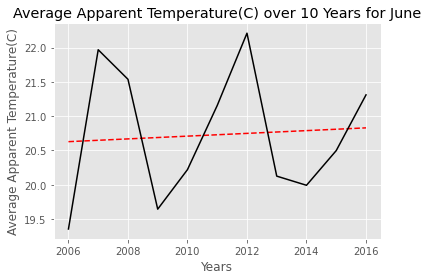

In [175]:
# Plot for June
Years_x = [x for x,y in Avg_Year_grp.index if y == 'June' ]
Avg_Temp_y = []
for i in Years_x:
    Avg_Temp_y.append(Avg_Year_grp.loc[(i,'June'),('Temperature (C)','mean')])   
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Temp_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--") 
print("Equation of trend line is {}".format(p))

plt.title('Average Apparent Temperature(C) over 10 Years for June')
plt.xlabel('Years')
plt.ylabel('Average Apparent Temperature(C)')
plt.plot(Years_x,Avg_Temp_y,color='k')
plt.tight_layout()
plt.savefig('6a.png')
plt.show()    

Equation of trend line for Humidity Plot is  
-0.001182 x + 3.064


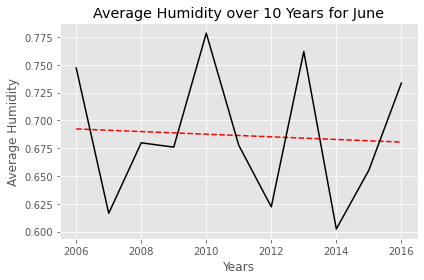

In [176]:
#Humidity Plot for June
Years_x = [x for x,y in Avg_Year_grp.index if y == 'June' ]
Avg_Humidity_y = []
for i in Years_x:
    Avg_Humidity_y.append(Avg_Year_grp.loc[(i,'June'),('Humidity','mean')])    
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Humidity_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--")    
print("Equation of trend line for Humidity Plot is {}".format(p))

plt.title('Average Humidity over 10 Years for June')
plt.xlabel('Years')
plt.ylabel('Average Humidity')
plt.plot(Years_x,Avg_Humidity_y,color='k')
plt.tight_layout()
plt.savefig('6b.png')
plt.show() 

Equation of trend line is  
-0.03355 x + 90.43


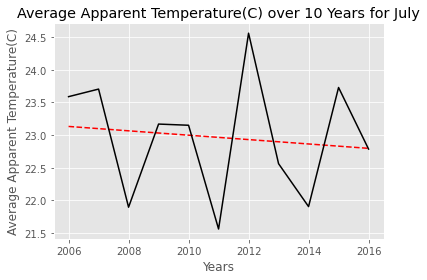

In [177]:
# Plot for July
Years_x = [x for x,y in Avg_Year_grp.index if y == 'July' ]
Avg_Temp_y = []
for i in Years_x:
    Avg_Temp_y.append(Avg_Year_grp.loc[(i,'July'),('Temperature (C)','mean')])   
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Temp_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--") 
print("Equation of trend line is {}".format(p))

plt.title('Average Apparent Temperature(C) over 10 Years for July')
plt.xlabel('Years')
plt.ylabel('Average Apparent Temperature(C)')
plt.plot(Years_x,Avg_Temp_y,color='k')
plt.tight_layout()
plt.savefig('7a.png')
plt.show()    

Equation of trend line for Humidity Plot is  
0.006731 x - 12.9


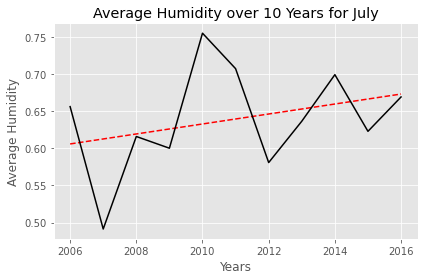

In [178]:
#Humidity Plot for July
Years_x = [x for x,y in Avg_Year_grp.index if y == 'July' ]
Avg_Humidity_y = []
for i in Years_x:
    Avg_Humidity_y.append(Avg_Year_grp.loc[(i,'July'),('Humidity','mean')])    
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Humidity_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--")    
print("Equation of trend line for Humidity Plot is {}".format(p))

plt.title('Average Humidity over 10 Years for July')
plt.xlabel('Years')
plt.ylabel('Average Humidity')
plt.plot(Years_x,Avg_Humidity_y,color='k')
plt.tight_layout()
plt.savefig('7b.png')
plt.show() 

Equation of trend line is  
0.07678 x - 132.1


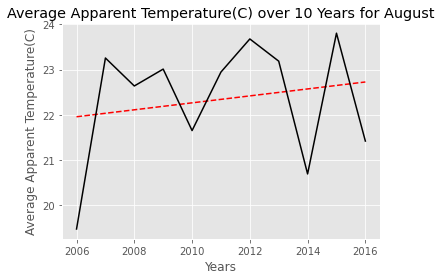

In [179]:
# Plot for August
Years_x = [x for x,y in Avg_Year_grp.index if y == 'August' ]
Avg_Temp_y = []
for i in Years_x:
    Avg_Temp_y.append(Avg_Year_grp.loc[(i,'August'),('Temperature (C)','mean')])   
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Temp_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--") 
print("Equation of trend line is {}".format(p))

plt.title('Average Apparent Temperature(C) over 10 Years for August')
plt.xlabel('Years')
plt.ylabel('Average Apparent Temperature(C)')
plt.plot(Years_x,Avg_Temp_y,color='k')
plt.tight_layout()
plt.savefig('8a.png')
plt.show()    

Equation of trend line for Humidity Plot is  
0.001612 x - 2.608


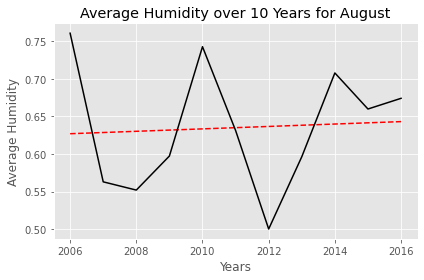

In [180]:
#Humidity Plot for August
Years_x = [x for x,y in Avg_Year_grp.index if y == 'August' ]
Avg_Humidity_y = []
for i in Years_x:
    Avg_Humidity_y.append(Avg_Year_grp.loc[(i,'August'),('Humidity','mean')])    
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Humidity_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--")    
print("Equation of trend line for Humidity Plot is {}".format(p))

plt.title('Average Humidity over 10 Years for August')
plt.xlabel('Years')
plt.ylabel('Average Humidity')
plt.plot(Years_x,Avg_Humidity_y,color='k')
plt.tight_layout()
plt.savefig('8b.png')
plt.show() 

Equation of trend line is  
0.1573 x - 298.8


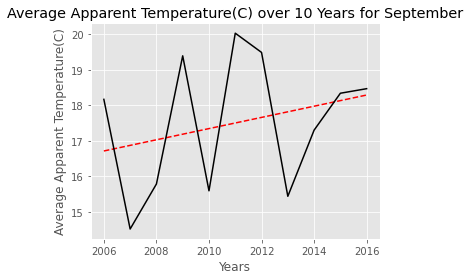

In [181]:
# Plot for September
Years_x = [x for x,y in Avg_Year_grp.index if y == 'September' ]
Avg_Temp_y = []
for i in Years_x:
    Avg_Temp_y.append(Avg_Year_grp.loc[(i,'September'),('Temperature (C)','mean')])   

z = np.polyfit(Years_x,Avg_Temp_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--") 
print("Equation of trend line is {}".format(p))
plt.style.use('ggplot')
plt.title('Average Apparent Temperature(C) over 10 Years for September')
plt.xlabel('Years')
plt.ylabel('Average Apparent Temperature(C)')
plt.plot(Years_x,Avg_Temp_y,color='k')
plt.tight_layout()
plt.savefig('9a.png')
plt.show()    

Equation of trend line for Humidity Plot is  
0.003366 x - 6.08


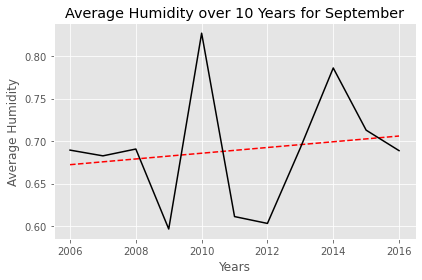

In [182]:
#Humidity Plot for September
Years_x = [x for x,y in Avg_Year_grp.index if y == 'September' ]
Avg_Humidity_y = []
for i in Years_x:
    Avg_Humidity_y.append(Avg_Year_grp.loc[(i,'September'),('Humidity','mean')])    
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Humidity_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--")    
print("Equation of trend line for Humidity Plot is {}".format(p))

plt.title('Average Humidity over 10 Years for September')
plt.xlabel('Years')
plt.ylabel('Average Humidity')
plt.plot(Years_x,Avg_Humidity_y,color='k')
plt.tight_layout()
plt.savefig('9b.png')
plt.show() 

Equation of trend line is  
-0.07068 x + 153.5


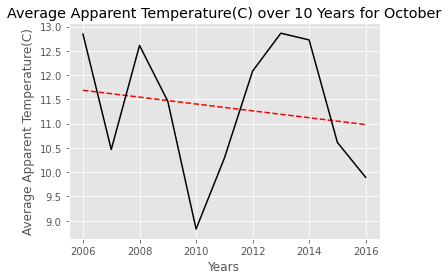

In [183]:
# Plot for October
Years_x = [x for x,y in Avg_Year_grp.index if y == 'October' ]
Avg_Temp_y = []
for i in Years_x:
    Avg_Temp_y.append(Avg_Year_grp.loc[(i,'October'),('Temperature (C)','mean')])   
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Temp_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--") 
print("Equation of trend line is {}".format(p))

plt.title('Average Apparent Temperature(C) over 10 Years for October')
plt.xlabel('Years')
plt.ylabel('Average Apparent Temperature(C)')
plt.plot(Years_x,Avg_Temp_y,color='k')
plt.tight_layout()
plt.savefig('10a.png')
plt.show()    

Equation of trend line for Humidity Plot is  
0.008141 x - 15.6


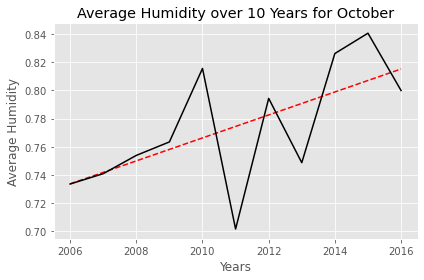

In [184]:
#Humidity Plot for October
Years_x = [x for x,y in Avg_Year_grp.index if y == 'October' ]
Avg_Humidity_y = []
for i in Years_x:
    Avg_Humidity_y.append(Avg_Year_grp.loc[(i,'October'),('Humidity','mean')])    
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Humidity_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--")    
print("Equation of trend line for Humidity Plot is {}".format(p))

plt.title('Average Humidity over 10 Years for October')
plt.xlabel('Years')
plt.ylabel('Average Humidity')
plt.plot(Years_x,Avg_Humidity_y,color='k')
plt.tight_layout()
plt.savefig('10b.png')
plt.show() 

Equation of trend line is  
0.03669 x - 67.19


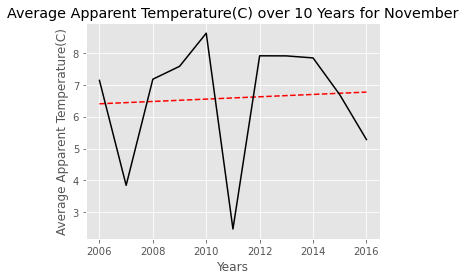

In [185]:
# Plot for November
Years_x = [x for x,y in Avg_Year_grp.index if y == 'November' ]
Avg_Temp_y = []
for i in Years_x:
    Avg_Temp_y.append(Avg_Year_grp.loc[(i,'November'),('Temperature (C)','mean')])   
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Temp_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--") 
print("Equation of trend line is {}".format(p))

plt.title('Average Apparent Temperature(C) over 10 Years for November')
plt.xlabel('Years')
plt.ylabel('Average Apparent Temperature(C)')
plt.plot(Years_x,Avg_Temp_y,color='k')
plt.tight_layout()
plt.savefig('11a.png')
plt.show()    

Equation of trend line for Humidity Plot is  
0.003554 x - 6.32


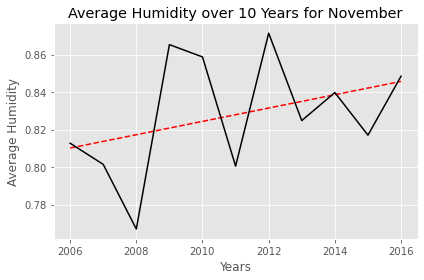

In [186]:
#Humidity Plot for November
Years_x = [x for x,y in Avg_Year_grp.index if y == 'November' ]
Avg_Humidity_y = []
for i in Years_x:
    Avg_Humidity_y.append(Avg_Year_grp.loc[(i,'November'),('Humidity','mean')])    
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Humidity_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--")    
print("Equation of trend line for Humidity Plot is {}".format(p))

plt.title('Average Humidity over 10 Years for November')
plt.xlabel('Years')
plt.ylabel('Average Humidity')
plt.plot(Years_x,Avg_Humidity_y,color='k')
plt.tight_layout()
plt.savefig('11b.png')
plt.show() 

Equation of trend line is  
0.09122 x - 181.9


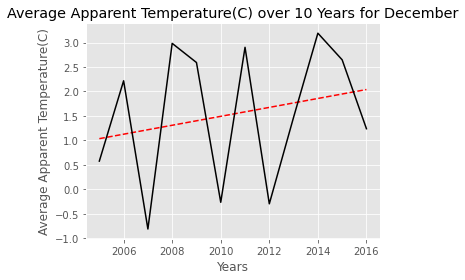

In [187]:
# Plot for December
Years_x = [x for x,y in Avg_Year_grp.index if y == 'December' ]
Avg_Temp_y = []
for i in Years_x:
    Avg_Temp_y.append(Avg_Year_grp.loc[(i,'December'),('Temperature (C)','mean')])   
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Temp_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--") 
print("Equation of trend line is {}".format(p))

plt.title('Average Apparent Temperature(C) over 10 Years for December')
plt.xlabel('Years')
plt.ylabel('Average Apparent Temperature(C)')
plt.plot(Years_x,Avg_Temp_y,color='k')
plt.tight_layout()
plt.savefig('12a.png')
plt.show()    

Equation of trend line for Humidity Plot is  
0.0002569 x + 0.3556


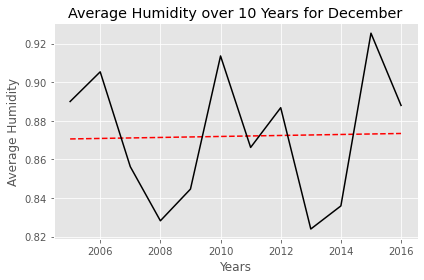

In [188]:
#Humidity Plot for December
Years_x = [x for x,y in Avg_Year_grp.index if y == 'December' ]
Avg_Humidity_y = []
for i in Years_x:
    Avg_Humidity_y.append(Avg_Year_grp.loc[(i,'December'),('Humidity','mean')])    
plt.style.use('ggplot')
z = np.polyfit(Years_x,Avg_Humidity_y,1)
p = np.poly1d(z)
plt.plot(Years_x,p(Years_x),"r--")    
print("Equation of trend line for Humidity Plot is {}".format(p))

plt.title('Average Humidity over 10 Years for December')
plt.xlabel('Years')
plt.ylabel('Average Humidity')
plt.plot(Years_x,Avg_Humidity_y,color='k')
plt.tight_layout()
plt.savefig('12b.png')
plt.show() 